# Demonstrate the Ability to Pass Mulitple Weather Years Through the TELL Model


In [1]:
# Start by importing the packages we need:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta


## Set the Directory Structure

In [2]:
# Identify the top-level directory and the subdirectory where the data will be stored:
load_data_input_dir =  '/Users/burl878/Documents/GODEEEP/Data/TELL/Scenario_Blast/rcp85hotter_ssp5/2035/'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/load_analysis/figures/'


## Set the BA and Year to Plot


In [3]:
ba_to_plot = 'CISO'


## Process the Peak Load Magnitude and Date for Each Sample


In [4]:
#Initiate a counter and empty dataframe to store the results:
counter = 0;
output_df = pd.DataFrame()


# Loop over the years of weather data:
for year in range(2020,2059,1):
    # Iterate the counter by one:
    counter = counter + 1
        
    # Read in the TELL BA output file for that year and scenario:
    tell_df = pd.read_csv(load_data_input_dir + 'TELL_Balancing_Authority_Hourly_Load_Data_' + str(year) + '_Scaled_2035.csv')
    
    # Convert the time to a datetime variable:
    tell_df['Time_UTC'] = pd.to_datetime(tell_df['Time_UTC'], format='%Y-%m-%d %H:%M:%S')
    
    # Subset to just the BA to plot:
    tell_df = tell_df[tell_df['BA_Code'] == ba_to_plot]
    
    # Put the output in a new dataframe:
    output_df.loc[counter, 'Year'] = year
    output_df.loc[counter, 'Total_Load_TWh'] = (tell_df['Scaled_TELL_BA_Load_MWh'].sum().round(6)) / 1000000
    output_df.loc[counter, 'Peak_Load_MWh'] = tell_df['Scaled_TELL_BA_Load_MWh'].max()
    output_df.loc[counter, 'Peak_Hour'] = tell_df['Time_UTC'].loc[tell_df['Scaled_TELL_BA_Load_MWh'].idxmax()] 
    output_df.loc[counter, 'Peak_Day_of_Year'] = tell_df['Time_UTC'].loc[tell_df['Scaled_TELL_BA_Load_MWh'].idxmax()].dayofyear
    
    # Clean up and move to the next year in the loop:
    del tell_df
    
output_df


,Year,Total_Load_TWh,Peak_Load_MWh,Peak_Hour,Peak_Day_of_Year
1,2020.0,306.004457,66868.96,2020-07-29 01:00:00,211.0
2,2021.0,305.701052,62607.61,2021-08-27 01:00:00,239.0
3,2022.0,306.169534,64651.63,2022-08-22 01:00:00,234.0
4,2023.0,306.356777,68459.64,2023-08-07 01:00:00,219.0
5,2024.0,305.860969,64200.63,2024-09-05 01:00:00,249.0
6,2025.0,305.883883,66817.39,2025-07-09 01:00:00,190.0
7,2026.0,306.372253,62809.72,2026-08-20 01:00:00,232.0
8,2027.0,306.057132,62405.06,2027-08-02 01:00:00,214.0
9,2028.0,305.937474,69624.28,2028-09-05 00:00:00,249.0
10,2029.0,306.202070,64476.65,2029-07-20 01:00:00,201.0


## Make the Double Distribution Plot


<Figure size 2400x2000 with 0 Axes>

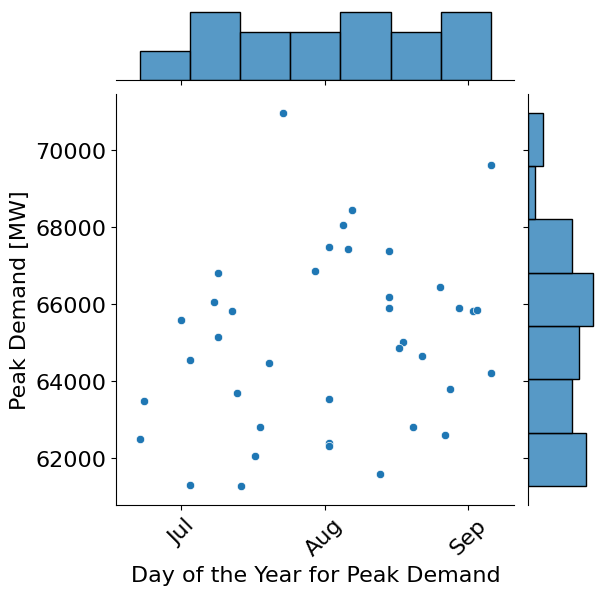

In [5]:
# Make the plot:
plt.figure(figsize=(24, 20))
plt.rcParams['font.size'] = 16

sns.jointplot(x = 'Peak_Day_of_Year', y = 'Peak_Load_MWh', data = output_df)
plt.xlabel('Day of the Year for Peak Demand')
plt.xticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation = 45)
plt.ylabel('Peak Demand [MW]')
plt.xlim([output_df['Peak_Day_of_Year'].min()-5, output_df['Peak_Day_of_Year'].max()+5])

plt.savefig(os.path.join(image_output_dir, (ba_to_plot + '_Peak_Demand_Distribution.png')), dpi=300, bbox_inches='tight', facecolor='white')
